In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import numpy as np

In [3]:
import phenom

In [4]:
from scrinet.interfaces import lalutils

In [5]:
from scrinet.analysis.timeseries import TimeSeries
from scrinet.analysis.frequencyseries import FrequencySeries

In [6]:
import tensorflow as tf

In [7]:
# distance=1e6*lalutils.lal.PC_SI
distance=1

In [8]:
p = lalutils.gen_td_wf_params(m1=30, m2=30, f_min=10, distance=distance)
t, amp, phase = lalutils.gen_td_wf(p, t_min=None, t_max=100)
h = amp * np.exp(-1.j * phase)
hp = np.real(h)
hc = np.imag(h)

In [9]:
p_fd = lalutils.gen_fd_wf_params(m1=30, m2=30, f_min=10, distance=distance, f_max=0)
fd_f, fd_amp, fd_phase = lalutils.gen_fd_wf(p_fd)
# fd_f_hz = phenom.MftoHz(fd_f, p_fd['m1'] + p_fd['m2'])

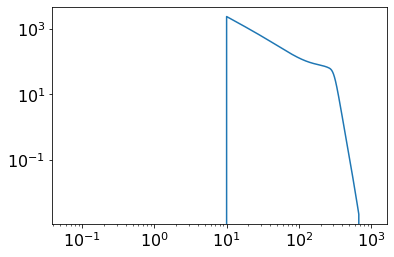

In [10]:
plt.figure()
plt.plot(fd_f, fd_amp)
plt.yscale('log')
plt.xscale('log')

Text(0.5, 0, 't/M')

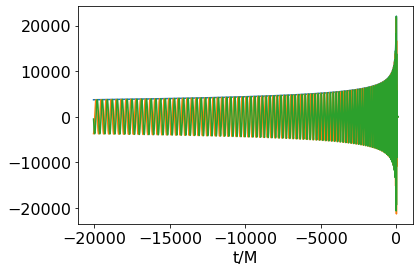

In [11]:
plt.figure()
plt.plot(t, amp)
plt.plot(t, hp)
plt.plot(t, hc)
plt.xlabel('t/M')

In [12]:
# convert time from M to s
t_s = phenom.MtoS(t, p['m1']+p['m2'])

Text(0.5, 0, 't/s')

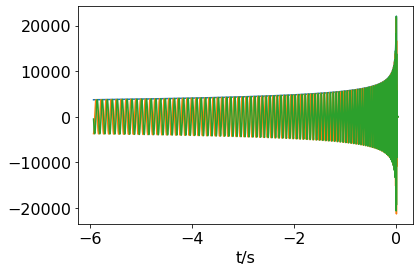

In [13]:
plt.figure()
plt.plot(t_s, amp)
plt.plot(t_s, hp)
plt.plot(t_s, hc)
plt.xlabel('t/s')

In [14]:
ts = TimeSeries(hp, t_s[1]-t_s[0], epoch=t_s[0])
# ts = TimeSeries(hp, t_s[1]-t_s[0])

In [15]:
fs = ts.to_frequencyseries(delta_f=None)

In [16]:
fs.delta_f

<tf.Tensor: shape=(), dtype=float64, numpy=0.16788949460999303>

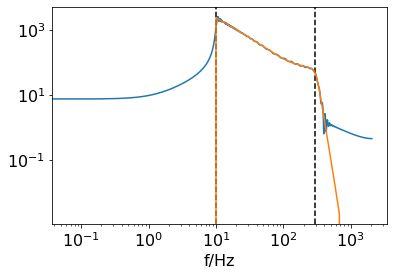

In [17]:
plt.figure()
plt.plot(fs.sample_frequencies.numpy(), np.abs(fs.data.numpy()))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('f/Hz')
plt.axvline(10, ls='--', c='k')
plt.axvline(298, ls='--', c='k')
# plt.axvline(894, ls='--', c='k')

plt.plot(fd_f, fd_amp)


In [18]:
fs.data

<tf.Tensor: shape=(12199,), dtype=complex128, numpy=
array([ 7.46891094+1.52766688e-12j,  7.47106061-9.86602305e-01j,
        7.47752301-1.97487639e+00j, ..., -0.45256372+1.54256942e-04j,
       -0.45256396+9.25546767e-05j, -0.45256409+3.08399566e-05j])>

In [19]:
ts.start_time

<tf.Tensor: shape=(), dtype=float64, numpy=-5.926662611>

In [20]:
ts.end_time

<tf.Tensor: shape=(), dtype=float64, numpy=0.029636217124999753>

In [21]:
ts.sample_rate

<tf.Tensor: shape=(), dtype=int64, numpy=4096>

In [22]:
ts.duration

<tf.Tensor: shape=(), dtype=float64, numpy=5.956298828125>

In [23]:
ts.sample_times[-1]-ts.sample_times[0]

<tf.Tensor: shape=(), dtype=float64, numpy=5.9560546875>

In [24]:
ts.sample_times

<tf.Tensor: shape=(24397,), dtype=float64, numpy=
array([-5.92666261, -5.92641847, -5.92617433, ...,  0.0289038 ,
        0.02914794,  0.02939208])>

In [25]:
ts._dtype

tf.float64

In [26]:
ts.delta_t.numpy()

0.000244140625

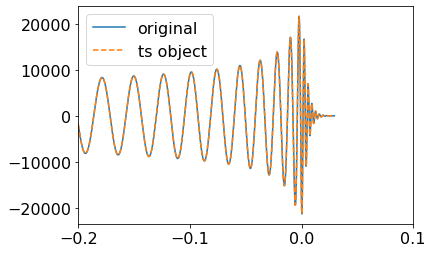

In [27]:
plt.figure()
plt.plot(t_s, hp, label='original')
plt.plot(ts.sample_times, ts.data, ls='--', label='ts object')
plt.xlim(-0.2,0.1)
plt.legend()

In [28]:
ts_from_fs = fs.to_timeseries()

In [29]:
ts_from_fs.sample_times

<tf.Tensor: shape=(24396,), dtype=float64, numpy=
array([-5.92666261, -5.92641846, -5.92617431, ...,  0.02890377,
        0.02914792,  0.02939207])>

In [30]:
ts_from_fs.data

<tf.Tensor: shape=(24396,), dtype=complex128, numpy=
array([-3693.48229107+5484.80544664j, -3685.42033611+3087.69341769j,
       -3676.64231047+3051.47395695j, ...,     6.10732049+3226.97767324j,
           8.47178751+3196.61786726j,     9.4476206 +5522.65487964j])>

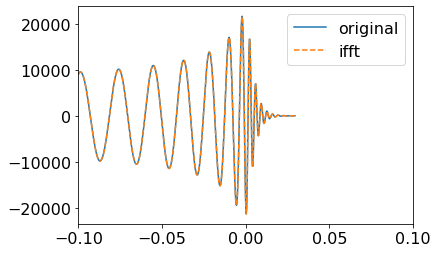

In [31]:
plt.figure()
plt.plot(t_s, hp, label='original')
plt.plot(ts_from_fs.sample_times, tf.math.real(ts_from_fs.data), ls='--', label='ifft')
plt.xlim(-0.1,0.1)
plt.legend()